In [ ]:
using Distributions, TimeIt, ProgressMeter, PyPlot, JLD
include("/home/postdoc/dsen/Desktop/G-ZZ/shrinkage_prior/synthetic_data/temp.jl")

In [2]:
X, y = load("data_simple.jld", "X", "y")
d, Nobs = size(X)
σ02 = 1
my_pr = SS_prior(d, σ02)
my_ll = ll_logistic_sp(X,y)
my_model = model(my_ll, my_pr);

In [3]:
# Sub-sampling without control variates and with weights:
mb_size = 10
max_attempts = 5*10^7
lambda_list = Float32.(logspace(-2,1.6,15))
Print = false

false

In [4]:
start_overall = time()
for (k,lambda) in enumerate(lambda_list[1:3])
    start = time()
    run_sampler(my_model, lambda, max_attempts, mb_size, Print) 
    print(k, ". Sampling for lambda = ", round(lambda,3), " in ", round((time()-start)/60,1), " mins \n")
end
print("Overall in ", round((time()-start_overall)/60,1), " mins")

1. Sampling for lambda = 0.01 in 264.6 mins 
2. Sampling for lambda = 0.018 in 262.3 mins 
3. Sampling for lambda = 0.033 in 248.9 mins 
Overall in 775.8 mins

1. lambda = 0.01 slowest mixing = 107.587
2. lambda = 0.018 slowest mixing = 80.467
3. lambda = 0.033 slowest mixing = 49.78
4. lambda = 0.059 slowest mixing = 31.771
5. lambda = 0.107 slowest mixing = 18.463
6. lambda = 0.193 slowest mixing = 13.178
7. lambda = 0.349 slowest mixing = 9.564
8. lambda = 0.631 slowest mixing = 8.329
9. lambda = 1.141 slowest mixing = 7.805
10. lambda = 2.062 slowest mixing = 6.898
11. lambda = 3.728 slowest mixing = 7.044
12. lambda = 6.739 slowest mixing = 6.758
13. lambda = 12.182 slowest mixing = 6.343
14. lambda = 22.022 slowest mixing = 6.383
15. lambda = 

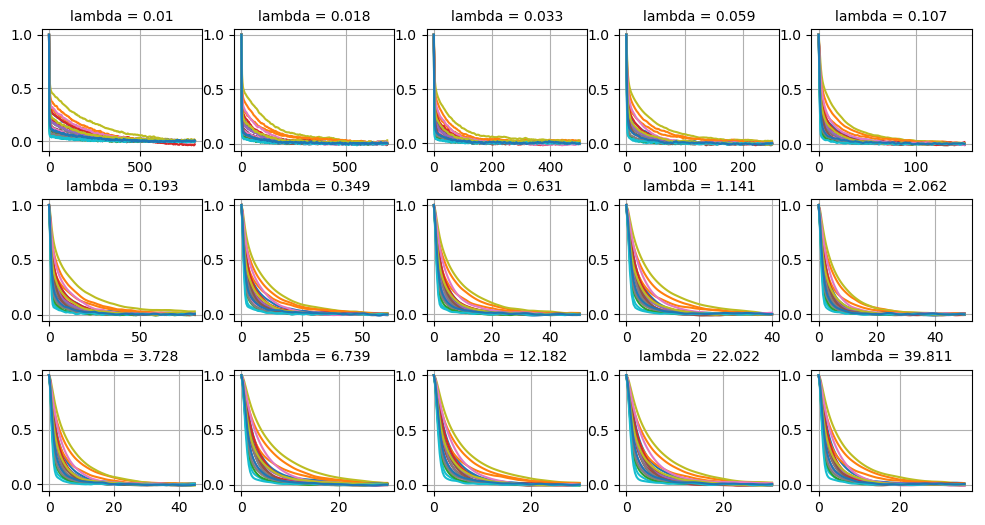

39.811 slowest mixing = 6.756


In [4]:
fig = figure("pyplot_barplot",figsize=(12,6))
n_samples = 10^5-1
maxlags = [800,700,500,250,150, 160,120,100,80,100, 150,100,100,100,120]
h_list = [1,1,1,1,1, 5e-1,5e-1,5e-1,5e-1,5e-1, 3e-1,3e-1,3e-1,3e-1,3e-1]
discard = 0
iacts = zeros(15)
for j in 1:3 
    for i in 1:5
        k = (j-1)*5+i
        lambda = lambda_list[k]
        filename  = "/xtmp/GZZ_data/shrinkage_prior/synthetic_data/lambda:"*
                    string(lambda)*"-d:"*string(d)*"-Nobs:"*
                    string(Nobs)*"-mb_size:"*string(mb_size)*".jld"
        
        xt_skel, bt_skel = load(filename, "xt_skeleton", "bt_skeleton")
        h = h_list[k]
        xi_samples = extract_samples(xt_skel[:,discard+1:end], 
                                     bt_skel[:,discard+1:end], 
                                     h,"linear")[:,1:end-1];
        subplot(3,5,k)
        maxlag = maxlags[k]
        for dim in 1:size(xi_samples,1)
            plot(h*(0:maxlag), acf(xi_samples[dim,:],maxlag))
            title("lambda = "*string(round(lambda,3)), fontsize=10)
            grid(true)
        end
        iacts[k] = maximum([sum(acf(xi_samples[dim,:],maxlag)) for dim in 1:size(xi_samples,1)])
        print(k, ". lambda = ", round(lambda,3), " slowest mixing = ", 
               round(h*iacts[k],3), "\n")
        xt_skel, bt_skel, xi_samples = [], [], []
        gc()
    end
end
subplots_adjust(hspace=0.4)

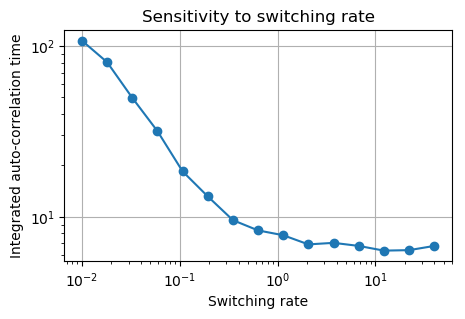

In [5]:
fig = figure("pyplot_barplot",figsize=(5,3))
plot(lambda_list, h_list.*iacts, "o-")
# plot(lambda_list_new, 1./log.(1+lambda_list_new), label="theory")
xscale("log")
yscale("log")
xlabel("Switching rate")
ylabel("Integrated auto-correlation time")
title("Sensitivity to switching rate")
grid(true)

In [6]:
for j in 1:2 
    for i in 1:5
        k = (j-1)*5+i
        lambda = lambda_list[k]
        filename  = "/xtmp/GZZ_data/shrinkage_prior/synthetic_data/lambda:"*
        string(lambda)*"-d:"*string(d)*"-Nobs:"*
        string(Nobs)*"-mb_size:"*string(mb_size)*".jld"
        
        bt_skel = load(filename, "bt_skeleton")
        print(round(bt_skel[1,end],1), "\n")
    end
end

122747.5
122519.4
122661.3
122496.9
122523.4
122488.4
122471.0
122422.0
122217.2
121942.9
